In [95]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(style="ticks", palette="muted")

In [96]:
# hidden probabilities
means = np.array([0.3, 0.6, 0.5])


rnd = np.random.RandomState(7)

## Greedy Algorithm

In [97]:
def pull_lever(machine, means, S, F):
    # draw uniform random sample
    p = rnd.random_sample()
    if p < means[machine]:
        S[machine] += 1
    else:
        F[machine] += 1
        

In [98]:
def greedy_algorithm(num_trials, means):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

## e-greedy algorithm

In [99]:
def e_greedy_algorithm(num_trials, means, epsilon=0.0):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):

        p = rnd.random_sample()
    
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # epsilon number of times choose a random machine
        if p < epsilon:
            machine = rnd.randint(0, N)
            
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

## Thompson sampling

In [100]:
def thompson_algorithm(num_trials, means):
    """Thompson sampling algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = rnd.beta(S[i] + 1, F[i] + 1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

In [143]:
means = np.array([0.06, 0.05, 0.2, 0.4, 0.3])

num_trials = 10

gS, gF = greedy_algorithm(num_trials, means)

eS, eF = e_greedy_algorithm(num_trials, means, 0.05)

tS, tF = thompson_algorithm(num_trials, means)

print(sum(gS))
print(sum(eS))
print(sum(tS))

4
5
1


In [144]:
N = len(means)

num_trials = 1000

total_wins = 0

# current probabilities
probs = np.zeros(N)

# number of successes for each machine
S = np.zeros(N, dtype=np.int)

# number of failures for each machine
F = np.zeros(N, dtype=np.int)


# number of wins at each trial number
wins = np.zeros(num_trials)

for trial in range(num_trials):
    print("Trial {}".format(trial))
    for i in range(N):
        
        # draw from random sample
        probs[i] = rnd.beta(S[i]+1, F[i]+1)
        
    print(probs)
    machine = np.argmax(probs)
    print("Playing machine {}".format(machine))
    
    # draw from a random uniform distribution
    p = rnd.random_sample()
    if p < means[machine]:
        print(" -- win!")
        S[machine] += 1
        total_wins += 1
    else:
        print(" -- lose")
        F[machine] += 1
        
    wins[trial] = (total_wins)/(trial+1)
        
print("Total wins {}".format(total_wins))

Trial 0
[0.78307338 0.86935491 0.45160655 0.5031896  0.82449448]
Playing machine 1
 -- lose
Trial 1
[0.79489548 0.39988634 0.05251585 0.12864632 0.19633342]
Playing machine 0
 -- lose
Trial 2
[0.37035097 0.28287226 0.32485805 0.15747186 0.09186948]
Playing machine 0
 -- lose
Trial 3
[0.00311925 0.73976579 0.21827148 0.73162606 0.1770569 ]
Playing machine 1
 -- lose
Trial 4
[0.36965958 0.0223823  0.25567955 0.73712059 0.33972274]
Playing machine 3
 -- lose
Trial 5
[0.37175895 0.08867352 0.43196765 0.65835739 0.9768084 ]
Playing machine 4
 -- lose
Trial 6
[0.34505505 0.31965346 0.09251922 0.8107138  0.14497391]
Playing machine 3
 -- lose
Trial 7
[0.14801212 0.54007999 0.73743506 0.37008191 0.01816641]
Playing machine 2
 -- lose
Trial 8
[0.09554371 0.30598399 0.02436039 0.29513308 0.45645696]
Playing machine 4
 -- lose
Trial 9
[3.48315737e-04 2.22938196e-02 7.26257319e-01 6.79842067e-01
 3.18642753e-01]
Playing machine 2
 -- lose
Trial 10
[0.06275629 0.07351203 0.27931002 0.05788849 0.309

 -- win!
Trial 390
[0.00719812 0.01881374 0.30837651 0.42730684 0.35927628]
Playing machine 3
 -- lose
Trial 391
[0.00999131 0.08163163 0.27049543 0.42991996 0.2897164 ]
Playing machine 3
 -- lose
Trial 392
[0.22412036 0.03166838 0.21986239 0.40728939 0.30402364]
Playing machine 3
 -- lose
Trial 393
[0.03812742 0.2025325  0.10451754 0.39897406 0.20015681]
Playing machine 3
 -- win!
Trial 394
[0.16048901 0.21615279 0.0684495  0.40186838 0.24192175]
Playing machine 3
 -- win!
Trial 395
[0.10615527 0.01412835 0.08126044 0.40930679 0.1939147 ]
Playing machine 3
 -- lose
Trial 396
[0.03817233 0.01731902 0.20172564 0.39316869 0.33406358]
Playing machine 3
 -- win!
Trial 397
[0.00288925 0.15931616 0.15059779 0.38719453 0.35469248]
Playing machine 3
 -- lose
Trial 398
[0.07655203 0.11178011 0.12744742 0.41680519 0.29499528]
Playing machine 3
 -- win!
Trial 399
[0.16406002 0.0401532  0.09664903 0.42005242 0.24598065]
Playing machine 3
 -- lose
Trial 400
[0.11157274 0.10480984 0.21767585 0.40994

[0.00875092 0.01979224 0.2208733  0.40134005 0.31654377]
Playing machine 3
 -- lose
Trial 800
[0.1423954  0.25111536 0.23505569 0.42872344 0.32871087]
Playing machine 3
 -- win!
Trial 801
[0.01095431 0.01627982 0.16152695 0.37854768 0.2677141 ]
Playing machine 3
 -- lose
Trial 802
[0.22527327 0.21078392 0.0967025  0.41112335 0.33533846]
Playing machine 3
 -- lose
Trial 803
[0.10471043 0.14170227 0.17563195 0.38452136 0.3382029 ]
Playing machine 3
 -- win!
Trial 804
[0.32981885 0.18561085 0.18674439 0.43480471 0.37850838]
Playing machine 3
 -- lose
Trial 805
[0.00703696 0.22908113 0.11746991 0.39596214 0.30471063]
Playing machine 3
 -- lose
Trial 806
[0.10502973 0.07550862 0.15116506 0.40446663 0.41807164]
Playing machine 4
 -- lose
Trial 807
[0.16580808 0.00987664 0.23007497 0.38138549 0.41463132]
Playing machine 4
 -- lose
Trial 808
[0.1547358  0.01938358 0.11051543 0.40362219 0.38551896]
Playing machine 3
 -- win!
Trial 809
[0.08176276 0.11736077 0.24538903 0.37910521 0.35126518]
Pla

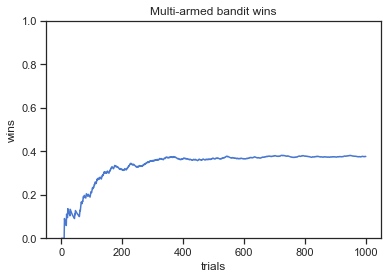

In [145]:
fig, ax = plt.subplots()
ax.plot(wins)

ax.set(xlabel='trials', ylabel='wins',
       title='Multi-armed bandit wins')
#ax.grid()
ax.set_ylim([0,1.0])

# fig.savefig("test.png")
plt.show()

In [146]:
print(probs)

[0.0327601  0.07705772 0.2427083  0.3735574  0.27537369]


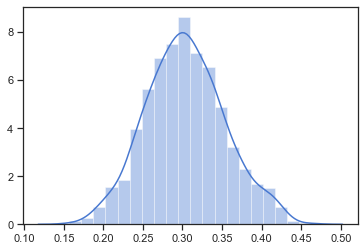

In [147]:
data = [np.random.beta(x+1, y+1, 1000) for x, y, in zip(S, F)]

sns.distplot(data[4], bins=20, kde=True)

In [148]:

# sns.set(color_codes=True)
# sns.set_context('paper')  #Everything is larger


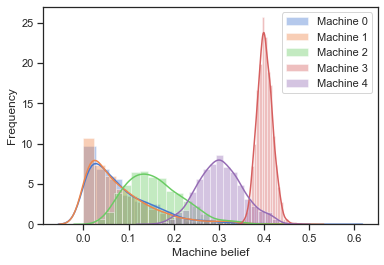

In [149]:
for i in range(N):
    ax = sns.distplot(data[i],
                     bins=20,
                     kde=True,
                     label='Machine {}'.format(i),
                     )


ax.set(xlabel='Machine belief', ylabel='Frequency')
ax.legend()
plt.savefig('foo.svg')